In [11]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns
import sklearn.preprocessing as prep

In [2]:
iris = load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
feature.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# create model and prediction
model = DBSCAN(min_samples=6)
predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

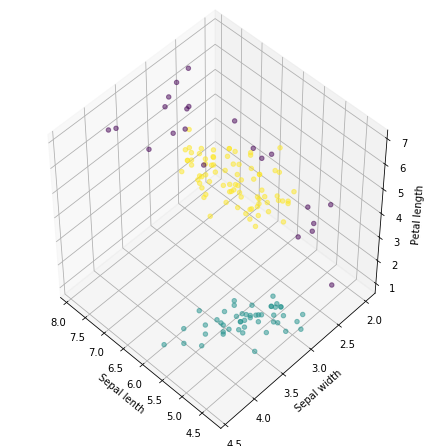

In [5]:
from mpl_toolkits.mplot3d import Axes3D
# scatter plot
fig = plt.figure( figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['Sepal length'],r['Sepal width'],r['Petal length'],c=r['predict'],alpha=0.5)
ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

___

In [8]:
rd = pd.read_excel('test.xlsx', sheet_name='Sheet1')
rd.head()

,name,id,WH,calls,outbound,aht,att,cph,csat,fcr,nsales,callsHour,outboundHour
0,최문정,MUCHO6,28,464,71,399.265086,194.278017,6.443351,0.812500,0.750000,8,16.571429,2.535714
1,권은경,EUKWO,20,260,36,408.957692,278.919231,6.070866,0.777778,0.666667,1,13.000000,1.800000
2,임민정,MILIM3,28,183,99,498.907104,242.601093,3.024002,0.700000,0.600000,10,6.535714,3.535714
3,박윤미,YOPAR3,20,150,72,652.446667,299.773333,4.468090,1.000000,0.714286,0,7.500000,3.600000
4,구현경,HYGOO,28,533,107,451.129456,253.863039,6.036183,0.931034,0.758621,1,19.035714,3.821429


In [9]:
testset = rd

In [41]:
# create model and prediction
model = DBSCAN(eps=.7, min_samples=3)
predict = pd.DataFrame(model.fit_predict(prep.MinMaxScaler().fit_transform(testset.iloc[:,5:])))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([testset,predict],axis=1)
r.head()

,name,id,WH,calls,outbound,aht,att,cph,csat,fcr,nsales,callsHour,outboundHour,predict
0,최문정,MUCHO6,28,464,71,399.265086,194.278017,6.443351,0.812500,0.750000,8,16.571429,2.535714,0
1,권은경,EUKWO,20,260,36,408.957692,278.919231,6.070866,0.777778,0.666667,1,13.000000,1.800000,0
2,임민정,MILIM3,28,183,99,498.907104,242.601093,3.024002,0.700000,0.600000,10,6.535714,3.535714,-1
3,박윤미,YOPAR3,20,150,72,652.446667,299.773333,4.468090,1.000000,0.714286,0,7.500000,3.600000,0
4,구현경,HYGOO,28,533,107,451.129456,253.863039,6.036183,0.931034,0.758621,1,19.035714,3.821429,0


In [42]:
predict.describe()

,predict
count,36.000000
mean,-0.083333
std,0.280306
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.000000


In [43]:
r.predict

0     0
1     0
2    -1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14   -1
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35   -1
Name: predict, dtype: int64

___
### scaling 후

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [53]:
scaler = StandardScaler()
model = DBSCAN(eps=0.3, min_samples=3)
pipeline = make_pipeline(scaler,model)

In [58]:

predict = pd.DataFrame(pipeline.fit_predict(testset.iloc[:,2:]))

In [59]:
predict.describe()

,0
count,35.0
mean,-1.0
std,0.0
min,-1.0
25%,-1.0
50%,-1.0
75%,-1.0
max,-1.0


___
### - dbscan으로 작업 할 때 큰 효과를 보지 못함
### - 파라미터 설정에 오류를 범한 것으로 보임 (모델에 대한 이해 부족)
### - 추후 업데이트 필요
### - 당장은 kmeans 시도

In [17]:
from sklearn.cluster import KMeans

In [20]:
scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,model)

In [23]:
pipeline.fit(testset.iloc[:,5:])

predict = pd.DataFrame(pipeline.predict(testset.iloc[:,5:]))

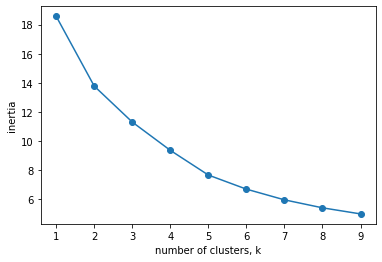

In [25]:
ks = range(1,10)

inertias = []



for k in ks:

    model = KMeans(n_clusters=k)

    model.fit(prep.MinMaxScaler().fit_transform(testset.iloc[:,5:]))

    inertias.append(model.inertia_)

    

# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

plt.show()



- scaling 없이

In [26]:
scaler = StandardScaler()
model = KMeans(n_clusters=5)
pipeline = make_pipeline(scaler,model)
pipeline.fit(testset.iloc[:,5:])

predict = pd.DataFrame(pipeline.predict(testset.iloc[:,5:]))

In [28]:
r = pd.concat([testset,predict],axis=1)
r.head()

,name,id,WH,calls,outbound,aht,att,cph,csat,fcr,nsales,callsHour,outboundHour,0
0,최문정,MUCHO6,28,464,71,399.265086,194.278017,6.443351,0.812500,0.750000,8,16.571429,2.535714,2
1,권은경,EUKWO,20,260,36,408.957692,278.919231,6.070866,0.777778,0.666667,1,13.000000,1.800000,0
2,임민정,MILIM3,28,183,99,498.907104,242.601093,3.024002,0.700000,0.600000,10,6.535714,3.535714,4
3,박윤미,YOPAR3,20,150,72,652.446667,299.773333,4.468090,1.000000,0.714286,0,7.500000,3.600000,3
4,구현경,HYGOO,28,533,107,451.129456,253.863039,6.036183,0.931034,0.758621,1,19.035714,3.821429,2


In [30]:
r

,name,id,WH,calls,outbound,aht,att,cph,csat,fcr,nsales,callsHour,outboundHour,0
0,최문정,MUCHO6,28,464,71,399.265086,194.278017,6.443351,0.812500,0.750000,8,16.571429,2.535714,2
1,권은경,EUKWO,20,260,36,408.957692,278.919231,6.070866,0.777778,0.666667,1,13.000000,1.800000,0
2,임민정,MILIM3,28,183,99,498.907104,242.601093,3.024002,0.700000,0.600000,10,6.535714,3.535714,4
3,박윤미,YOPAR3,20,150,72,652.446667,299.773333,4.468090,1.000000,0.714286,0,7.500000,3.600000,3
4,구현경,HYGOO,28,533,107,451.129456,253.863039,6.036183,0.931034,0.758621,1,19.035714,3.821429,2
5,유순희,SOYOU3,20,280,57,491.253571,288.250000,5.401148,0.937500,0.812500,3,14.000000,2.850000,3
6,김두연,DOKIM27,16,146,68,568.123288,283.486301,4.742056,1.000000,1.000000,3,9.125000,4.250000,3
7,윤창희,CHYOO4,16,177,66,577.774011,280.282486,3.528728,1.000000,1.000000,5,11.062500,4.125000,3
8,김병기,BYKIM7,28,182,150,552.241758,395.131868,2.244266,1.000000,0.785714,1,6.500000,5.357143,1
9,이석민,SELEE42,16,158,98,558.981013,296.107595,3.230185,0.750000,0.500000,4,9.875000,6.125000,4


In [29]:
r.to_csv('result.csv')

In [77]:
import sklearn.preprocessing as prep